In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.externals import joblib
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
df = pd.read_csv('/content/drive/MyDrive/insurance/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.groupby('region').agg('count')

,age,sex,bmi,children,smoker,charges
region,,,,,,
northeast,324,324,324,324,324,324
northwest,325,325,325,325,325,325
southeast,364,364,364,364,364,364
southwest,325,325,325,325,325,325


In [6]:
df.groupby('children').agg('count')

,age,sex,bmi,smoker,region,charges
children,,,,,,
0,574,574,574,574,574,574
1,324,324,324,324,324,324
2,240,240,240,240,240,240
3,157,157,157,157,157,157
4,25,25,25,25,25,25
5,18,18,18,18,18,18


In [7]:
df = df.replace({'children': {5:4}})
df.groupby('children').agg('count')

,age,sex,bmi,smoker,region,charges
children,,,,,,
0,574,574,574,574,574,574
1,324,324,324,324,324,324
2,240,240,240,240,240,240
3,157,157,157,157,157,157
4,43,43,43,43,43,43


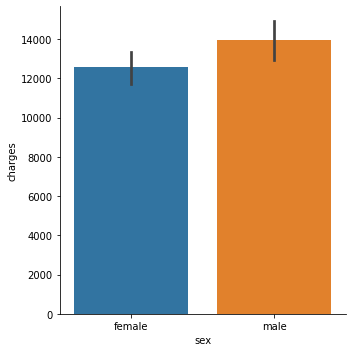

In [8]:
sns.catplot(x = 'sex', y = 'charges',kind = 'bar', data = df)

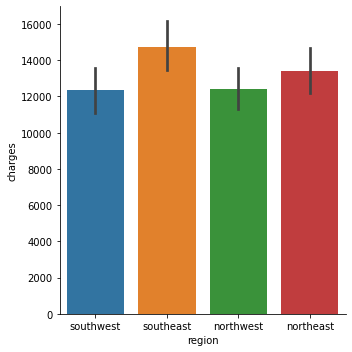

In [9]:
sns.catplot(x = 'region', y = 'charges',kind = 'bar', data = df)

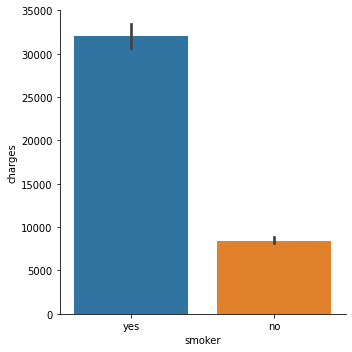

In [10]:
sns.catplot(x = 'smoker', y = 'charges',kind = 'bar', data = df)

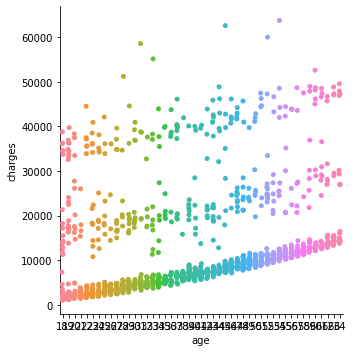

In [11]:
sns.catplot(x = 'age', y = 'charges', data = df)

Converting categorical data into numerical data

In [12]:
df['sex'] = df['sex'].replace({'male':0, 'female':1})

In [13]:
df['region'] = df['region'].replace({'northeast':0, 'northwest':1, 'southeast':2,'southwest':3})

In [14]:
df['smoker'] = df['smoker'].replace({'no':0, 'yes':1})

In [15]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,1,10600.54830
1334,18,1,31.920,0,0,0,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,3,2007.94500


Correlation Matrix

In [16]:
corr_matrix = df.corr()
corr_matrix['charges'].sort_values(ascending = False)

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.074528
region     -0.006208
sex        -0.057292
Name: charges, dtype: float64

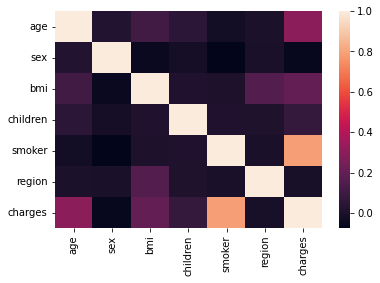

In [17]:
sns.heatmap(corr_matrix)

In [90]:
df1 = df.drop(columns=['children', 'region', 'charges'])


Extracting X and Y value for traing the dataset.

In [91]:
x = df1
y = df['charges']

In [92]:
y = y.astype(int)

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

Types of model we will used is stored in a dict format in model_params

In [94]:
model_params = {
    'linear_regression': {
        'model': LinearRegression(),
        'params' : {
        }  
    },
    'DecisionTreeClassifier': {
        'model': DecisionTreeClassifier(),
        'params' : {
        }  
    },
    'Lasso': {
        'model': Lasso(),
        'params' : {
        }  
    },
    'Ridge': {
        'model': Ridge(),
        'params' : {
            'alpha':[0.1]
        }  
    },
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,3,5]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,3,15]
        }
    }
}

Fit traing dataset in all models and choose the best one

In [95]:
scores = []
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=2, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
models_used = pd.DataFrame(scores,columns=['model','best_score','best_params'])

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)


Choosing best model

In [96]:
temp = models_used.sort_values(by=['best_score'],ascending = False)
name = temp.iloc[0].model
model = model_params[name]['model']
model = model.fit(x_train,y_train)

In [ ]:
column_strt = 0
column_end = 10
predicted = []
actual = df.charges.iloc[column_strt:column_end]
df.result = df.charges
length = len(df.iloc[0])
for i in range(column_strt,column_end):
  arr = df.iloc[i][:length-1].values
  predict = int(model.predict([arr])[0])
  predicted.append(predict)
actual = pd.DataFrame(actual)
predicted = pd.DataFrame(predicted)
final = pd.concat([actual, predicted.reindex(actual.index)], axis=1)
final = final.rename(columns = {'PlacedOrNot': 'Actual Values',0:'predicted Values'})
final

In [108]:
df.result = df.charges
arr =[28,0,33.000,0]

In [102]:
df1.head()

,age,sex,bmi,smoker
0,19,1,27.900,1
1,18,0,33.770,0
2,28,0,33.000,0
3,33,0,22.705,0
4,32,0,28.880,0


In [87]:
model

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Predicting the value

In [109]:
input = np.array(arr)
predicted = model.predict([input])[0]
Actual = df.result.iloc[2]
print('The Predicted value is: ', predicted)
print('The Actual value is: ', Actual)

The Predicted value is:  6019.8570384372015
The Actual value is:  4449.462


In [117]:
cd /content/drive/MyDrive/insurance

/content/drive/MyDrive/insurance


In [118]:
joblib.dump(model, 'model.pkl')

['model.pkl']